# <center>层次聚类</center>

<center>**<font size = 5>Author : mandy</font>**</center>
<br/>
<center>**<font size = 5>Date : 20180914</font>**</center>

**层次聚类：**
有两个基本方法：自顶而下和自底而上。
自顶而将所有样本看做是同一簇，然后进行分裂。
自底而上将初所有样本看做不同的簇，然后进行凝聚。这种聚类的中心思想是：离观测点较近的点相比离观测点较远的点更可能是一类。 

### **BIRCH算法** （Balanced Iterative Reducing and Clustering Using Hierarchies）
利用层次方法的平衡迭代规约和聚类<br/>
BIRCH只需要单遍扫描数据集就能进行聚类<br/>
BIRCH算法适用于样本量较大的情况，这点和Mini Batch K-Means类似，但是BIRCH适用于类别数比较大的情况，而Mini Batch K-Means一般用于类别数适中或者较少的时候<br/>
BIRCH除了聚类还可以额外做一些异常点检测和数据初步按类别规约的预处理。但是如果数据特征的维度非常大，比如大于20，则BIRCH不太适合，此时Mini Batch K-Means的表现较好。

*前提条件*：主要是在数据量很大的时候使用，而且数据类型是numerical <br/> 
 Birch(利用层次方法的平衡迭代规约和聚类)：就是通过聚类特征(CF)形成一个聚类特征树，root层的CF个数就是聚类个数。
 <br/>
 **相关概念**
聚类特征(CF)：每一个CF是一个三元组,可以用（N，LS，SS）表示.其中N代表了这个CF中拥有的样本点的数量;LS代表了这个CF中拥有的样本点各特征维度的和向量,SS代表了这个CF中拥有的样本点各特征维度的平方和

![Alt text](https://images2015.cnblogs.com/blog/1042406/201612/1042406-20161214142636542-611911122.png)

 如上图所示：N = 5 

       LS=(3+2+4+4+3,4+6+5+7+8)=(16,30)

       SS =(32+22+42+42+32,42+62+52+72+82)=(54,190)

![Alt text](https://images2015.cnblogs.com/blog/1042406/201612/1042406-20161214143717151-481214189.png)

对于上图中的CF Tree,限定了B=7,L=5， 也就是说内部节点最多有7个CF(CF90下的圆),而叶子节点最多有5个CF(CF90到CF94)。叶子节点是通过双向链表连通的。

Birch算法函数

            a）sklearn.cluster.Birch

            b）主要参数（详细参数）

                 n_clusters ：聚类的目标个数。（可选）

                 threshold ：扫描半径（个人理解，官方说法比较绕口），设置小了分类就多。

                 branches_factor：每个节点中CF子集群的最大数量,默认为50。

            c）主要属性

                labels_ ：每个数据点的分类

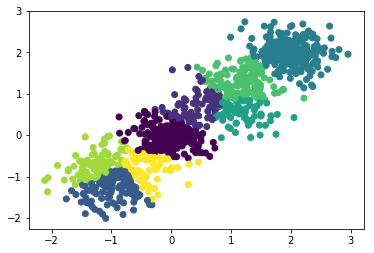

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.3, 0.4, 0.3], 
                  random_state =9)

##设置birch函数
birch = Birch(n_clusters = None)
##训练数据
y_pred = birch.fit_predict(X)
##绘图
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()


优点：

   （1）节省内在。叶子节点放在磁盘分区上，非叶子节点仅仅是存储了一个CF值，外加指向父节点和孩子节点的指针。

　　（2）快。合并两个两簇只需要两个CF算术相加即可；计算两个簇的距离只需要用到(N,LS,SS)这三个值足矣。

　　（3）一遍扫描数据库即可建立B树。

　　（4）可识别噪声点。建立好B树后把那些包含数据点少的MinCluster当作outlier。

　　（5）由于B树是高度平衡的，所以在树上进行插入或查找操作很快。

缺点：

　　（1）结果依赖于数据点的插入顺序。本属于同一个簇的点可能由于插入顺序相差很远而分到不同的簇中，即使同一个点在不同的时刻被插入，也会被分到不同的簇中。

　　（2）对非球状的簇聚类效果不好。这取决于簇直径和簇间距离的计算方法。

　　（3）对高维数据聚类效果不好。由于每个节点只能包含一定数目的子节点，最后得出来的簇可能和自然簇相差很大。

　　（4）birch适合于处理需要数十上百小时聚类的数据，但在整个过程中算法一旦中断，一切必须从头再来。

　　（5）局部性也导致了birch的聚类效果欠佳。当一个新点要插入B树时，它只跟很少一部分簇进行了相似性（通过计算簇间距离）比较，高的efficient导致低的effective。